# Laboratorio 2
### Entrega: jueves 6 de octubre, 23:59 horas


## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*(1-p) = p\\
E[X^2] & = & 1*p + 0*(1-p) = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

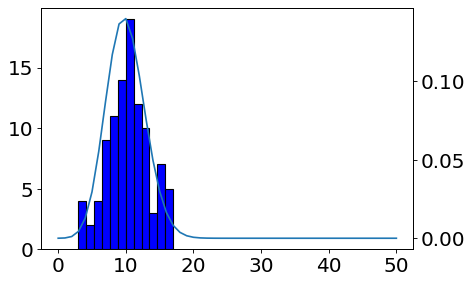

In [2]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


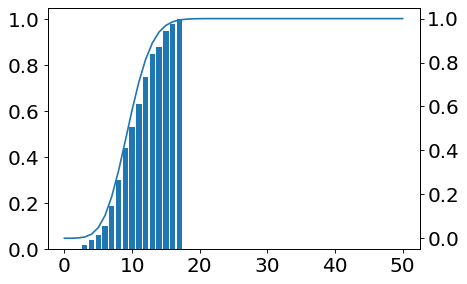

In [3]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [4]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 10.28  teórica:  10.0
varianza empírica: 9.921600000000007  teórica:  8.0
asimetría empírica: -0.008834613279616446 teórica:  0.21213203435596423
curtosis empírico:  -0.4607815257101904 teórico:  0.004999999999999977


#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

In [5]:
## Cálculo de esperanza y varianza SIMULADO VS TEORICO

np.random.seed(seed=233427) #para consistencia

size=100 #Valor a modificar

n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)


print('esperanza empírica:',promedio,' teórico: ',n*p)
print('varianza empírica:',var_emp,' teórico: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórico: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))


esperanza empírica: 10.09  teórico:  10.0
varianza empírica: 10.121900000000002  teórico:  8.0
asimetría empírica: 0.4489167716985867 teórico:  0.21213203435596423
curtosis empírico:  0.3778824962755962 teórico:  0.004999999999999977


| Tipo |Size| Esperanza | Varianza | Asimetría | Curtosis |
| -: | :-: | :-: | :-: | :-: | :-: |
| Teórica || 10.0 | 8.0| 0.2121320 | 0.0049999 |
| Simulación |100| 10.09 | 10.1219| 0.448916 | 0.377882 |
| Simulación |1000| 10.063 | 8.061031| 0.077477 | -0.162734 |
| Simulación |10000| 10.0391 | 7.973971 | 0.197294 | -0.010195 |
| Simulación |100000| 10.00088 | 8.030359 | 0.219165 | 0.004950 |
| Simulación |1000000| 10.000267 | 8.000534 | 0.214255 | 0.009494 |
| Simulación |10000000| 10.0001627  | 8.00062 | 0.212158| 0.004623|

1) Según los datos entregados a tráves de la simulación, el size mientras mayor sea su valor, más se acerca a los valores teóricos, donde podemos observar que ya con aproximadamente 100000 simulaciones se tienen valores muy cercanos. Ya con 1M y 10M estos valores son mejores.

In [6]:
## Cálculo de esperanza y varianza SIMULADO VS TEORICO

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, HBox
import ipywidgets as widgets

np.random.seed(seed=123456) #para consistencia

size=100000 #Por lo calculado anteriormente , y al realizar la comparación entre los distintos sizes,
#definimos el valor en 100000, ya que es el valor minimo para lograr un acercamiento a los valores teóricos

#Sliders para generar los nuevos datos

Nn = IntSlider(min=100, max=10000, step=100, value=50) #Valor de n variable
Np = FloatSlider(min=0.01, max=0.99, step=0.01, value=0.2) #Valor de p variable
    
def slider(N_n, N_p):
    
    n = N_n # valor original 50
    p = N_p # valor original 0.2
    datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
    promedio = sum(datos_bin)/size
    var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
    asim = stats.skew(datos_bin)
    curtos = stats.kurtosis(datos_bin)

    print('Esperanza empírica:',promedio,'             teórica: ',n*p)
    print('Varianza empírica:',var_emp,'     teórica: ', n*p*(1-p))
    print('Asimetria empírica:', asim, '  teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
    print('Curtosis empírico: ', curtos, ' teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

ip = interactive(slider,N_n=Nn, N_p=Np)
display(HBox(ip.children[:-1]))#Show all controls
display(ip.children[-1])#Show the output


Output()

2) 

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

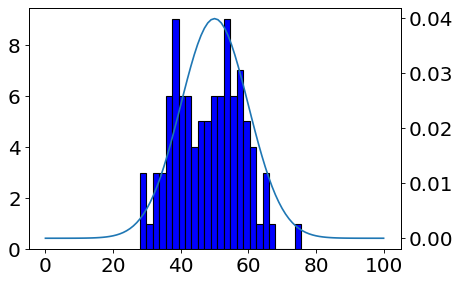

In [7]:
## simulación de size valores v.a. normal
size=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


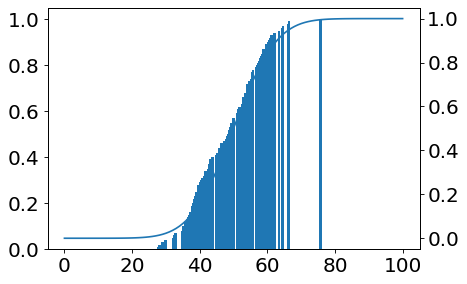

In [8]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [9]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 47.86801328307152  teórica:  50
varianza empírica: 99.47880875637405  teórica:  100
asimetría empírica: 0.09169138017467945 teórica:  0
curtosis empírico:  -0.62887205364951 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

1)

| Tipo |Size| Esperanza | Varianza | Asimetría | Curtosis |
| -: | :-: | :-: | :-: | :-: | :-: |
| Teórica || 50.0 | 100.0| 0 | 0 |
| Simulación |100|  50.2515| 69.9193| 0.0109 | -0.3445 |
| Simulación |1000| 50.2321 | 101.5685| 0.05537|-0.0794 |
| Simulación |10000| 49.8155 | 98.4041 | 0.0322| -0.0599 |
| Simulación |100000| 49.9878 | 100.8099 | -0.0023 |0.0071 |
| Simulación |1000000| 50.0081 | 99.8753 | 0.214255 |0.0050 |
| Simulación |10000000| 49.9975  | 100.0262 |  4.450e-05| 0.0014|

In [10]:
Nmu = IntSlider(min=20, max=200, step=10, value=50) #Valor de n variable
Nsigma = IntSlider(min=10, max=100, step=10, value=10) #Valor de p variable
    

def slider(N_mu,N_sigma):
    size=10000  #Valor a cambiar
    mu=N_mu #valor original 50
    sigma=N_sigma #valor original 10
    datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
    promedio = sum(datos_norm)/size
    var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
    asim = stats.skew(datos_norm)
    curtos = stats.kurtosis(datos_norm)
    print('esperanza empírica:',promedio,' teórica: ',mu)
    print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
    print('asimetría empírica:', asim, 'teórica: ',0)
    print('curtosis empírico: ', curtos, 'teórico: ',0)

    

ip = interactive(slider,N_mu=Nmu, N_sigma=Nsigma)
display(HBox(ip.children[:-1]))#Show all controls
display(ip.children[-1])#Show the output

Output()

2)

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída t-student de $k$ grados de libertad

#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

<center>
<h3>Para este estudio usaremos las ciudades de valdivia (datos_1) y Arica (datos_2). <h3>

    
| Ciudad |Latitud °| Longitud ° | 
| -: | :-: | :-: |
| Valdivia | -45 a -35| -80 a -70|
| Arica |-25 a -15| -75 a -65| 

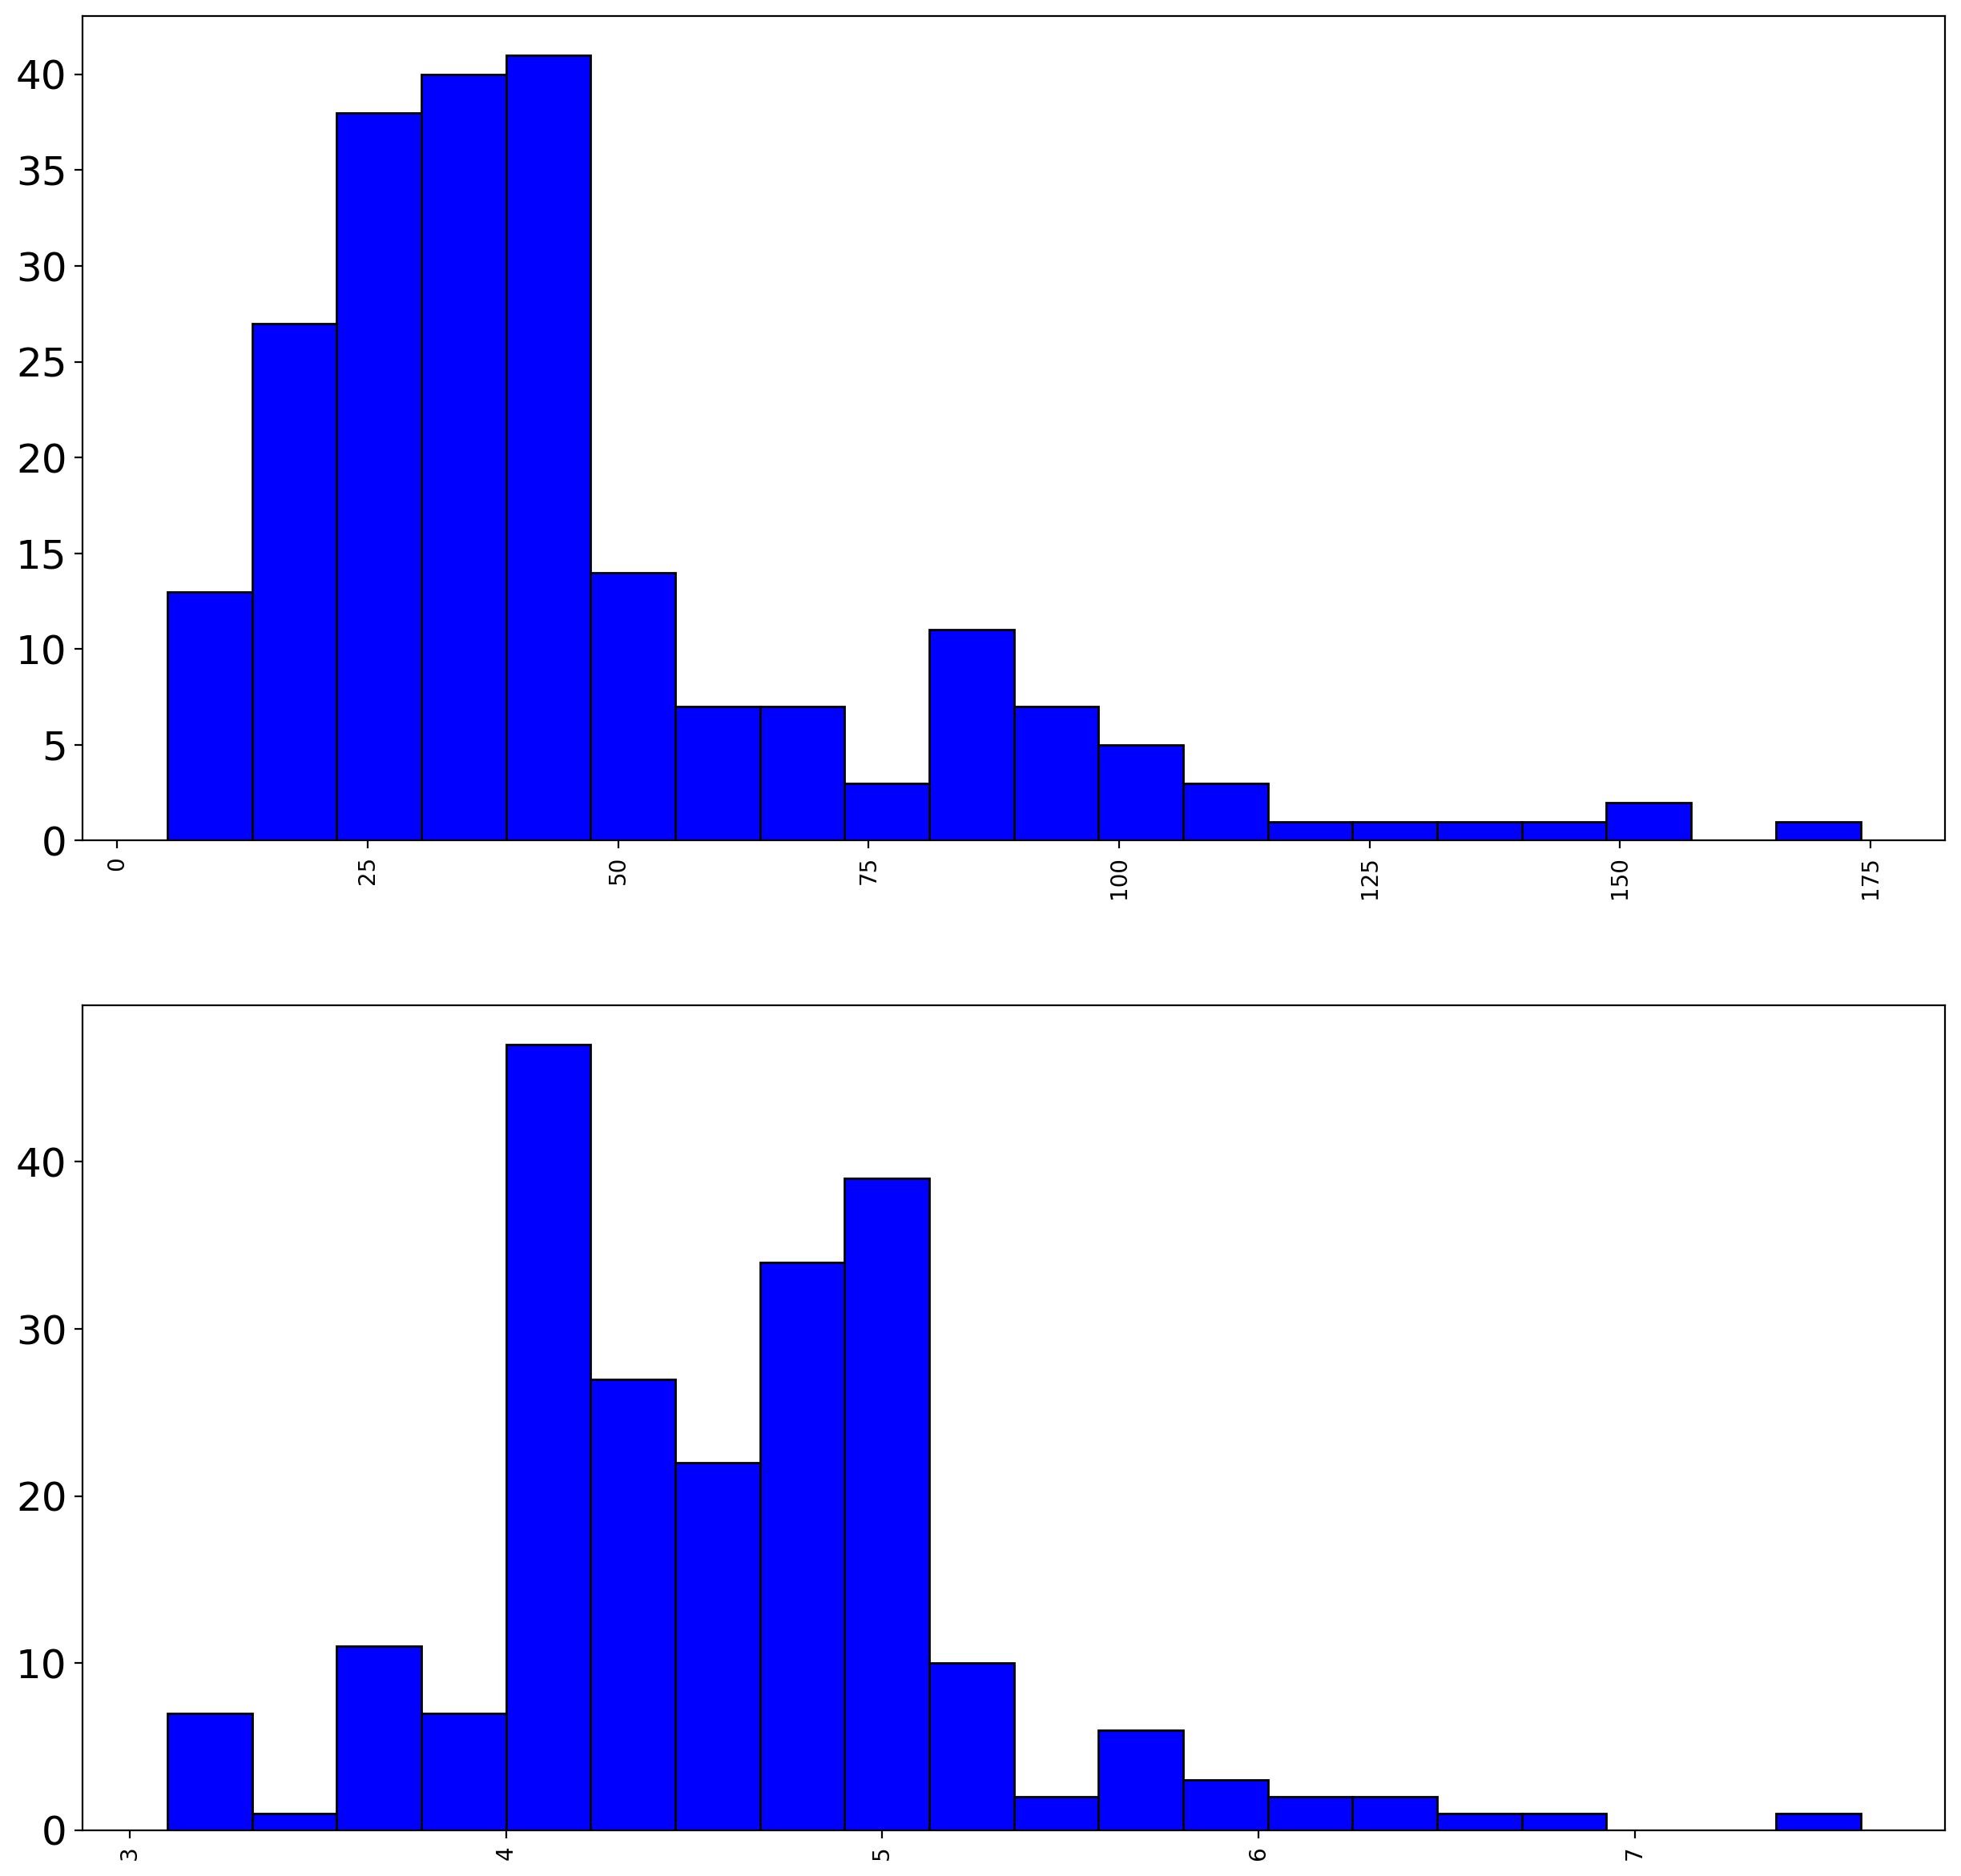

In [11]:
valores_1 = pd.read_csv('datos_1.csv',sep=';')
valores_2 = pd.read_csv('datos_2.csv',sep=';')
#display(valores_1)
#display(valores_2)


fig, ax = plt.subplots(2,1, figsize=(15,15))
ax[0].hist(valores_1['Profundidad'],20,color = 'blue',edgecolor = 'black')
ax[0].tick_params(axis='x', rotation=90, labelsize=10)
ax[1].hist(valores_1['Magnitud'],20,color = 'blue',edgecolor = 'black')
ax[1].tick_params(axis='x', rotation=90, labelsize=10)


esperanza empírica: 10.09  teórico:  10.0
varianza empírica: 10.121900000000002  teórico:  8.0
asimetría empírica: 0.4489167716985867 teórico:  0.21213203435596423
curtosis empírico:  0.3778824962755962 teórico:  0.004999999999999977


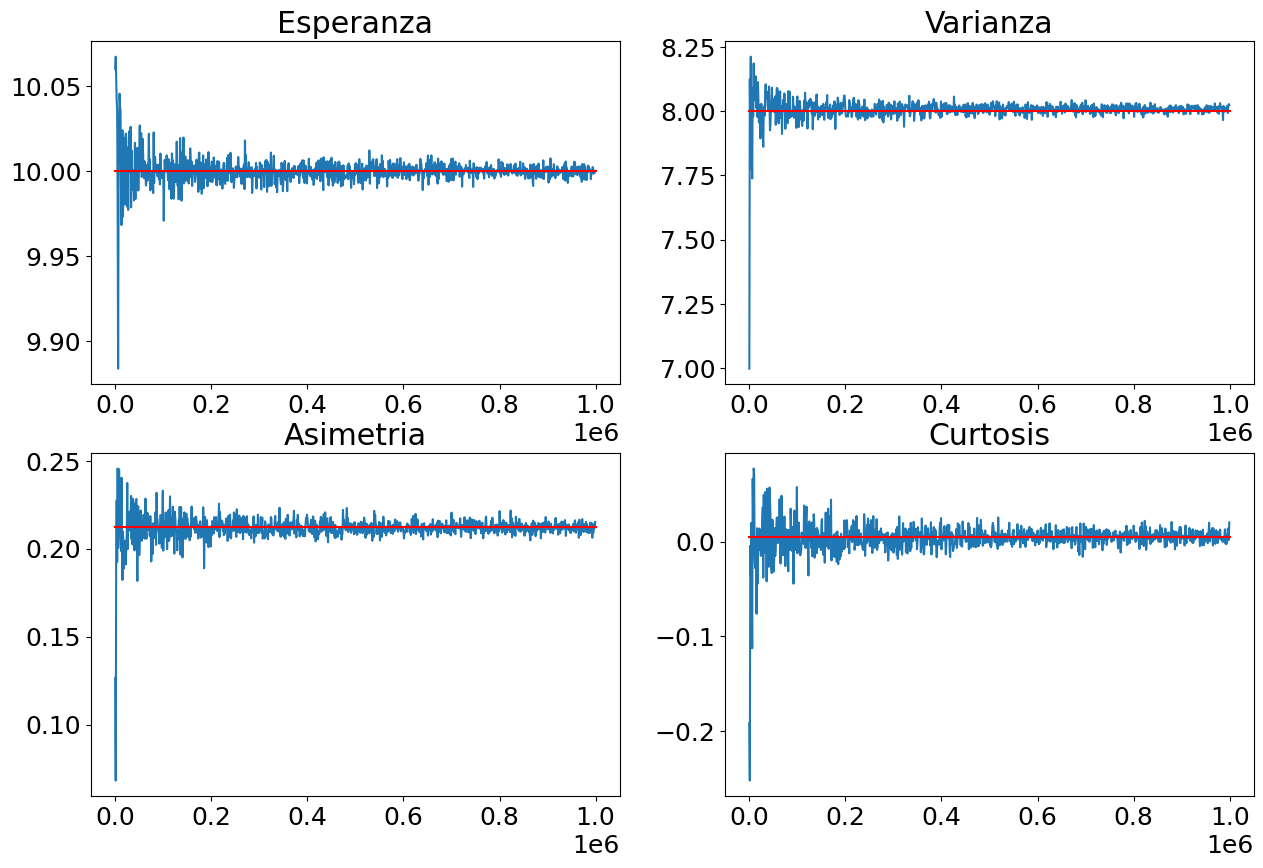

In [14]:
## Cálculo de esperanza y varianza SIMULADO VS TEORICO

np.random.seed(seed=233427) #para consistencia

size=100 #Valor a modificar

n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)


print('esperanza empírica:',promedio,' teórico: ',n*p)
print('varianza empírica:',var_emp,' teórico: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórico: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

prom_grafico=[]
var_emp_grafico=[]
asim_grafico=[]
curtos_grafico=[]

ran = range(100,1000000,1000)
for size in ran:
    datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
    prom_grafico.append(sum(datos_bin)/size)
    var_emp_grafico.append(sum((datos_bin - promedio)*(datos_bin-promedio))/size)
    asim_grafico.append(stats.skew(datos_bin))
    curtos_grafico.append(stats.kurtosis(datos_bin))


fig, axs = plt.subplots(2, 2,figsize=(15, 10), dpi=100)
axs[0,0].set_title("Esperanza")
axs[0,0].plot(ran,prom_grafico)
axs[0,0].plot((100,1000000), (n*p, n*p), color='red')
axs[0,1].set_title("Varianza")
axs[0,1].plot(ran,var_emp_grafico)
axs[0,1].plot((100,1000000), (n*p*(1-p), n*p*(1-p)), color='red')
axs[1,0].set_title("Asimetria")
axs[1,0].plot(ran,asim_grafico)
axs[1,0].plot((100,1000000), ((1-2*p)/(math.sqrt(n*p*(1-p))),(1-2*p)/(math.sqrt(n*p*(1-p)))), color='red')
axs[1,1].set_title("Curtosis")
axs[1,1].plot(ran,curtos_grafico)
axs[1,1].plot((100,1000000), ((1-6*p*(1-p))/(n*p*(1-p)),(1-6*p*(1-p))/(n*p*(1-p))), color='red')

esperanza empírica: 0.4990731658492643  teórico:  10.0
varianza empírica: 0.49908331672810574  teórico:  8.0
asimetría empírica: 1.411267227874422 teórico:  0.21213203435596423
curtosis empírico:  1.9664965614094791 teórico:  0.004999999999999977


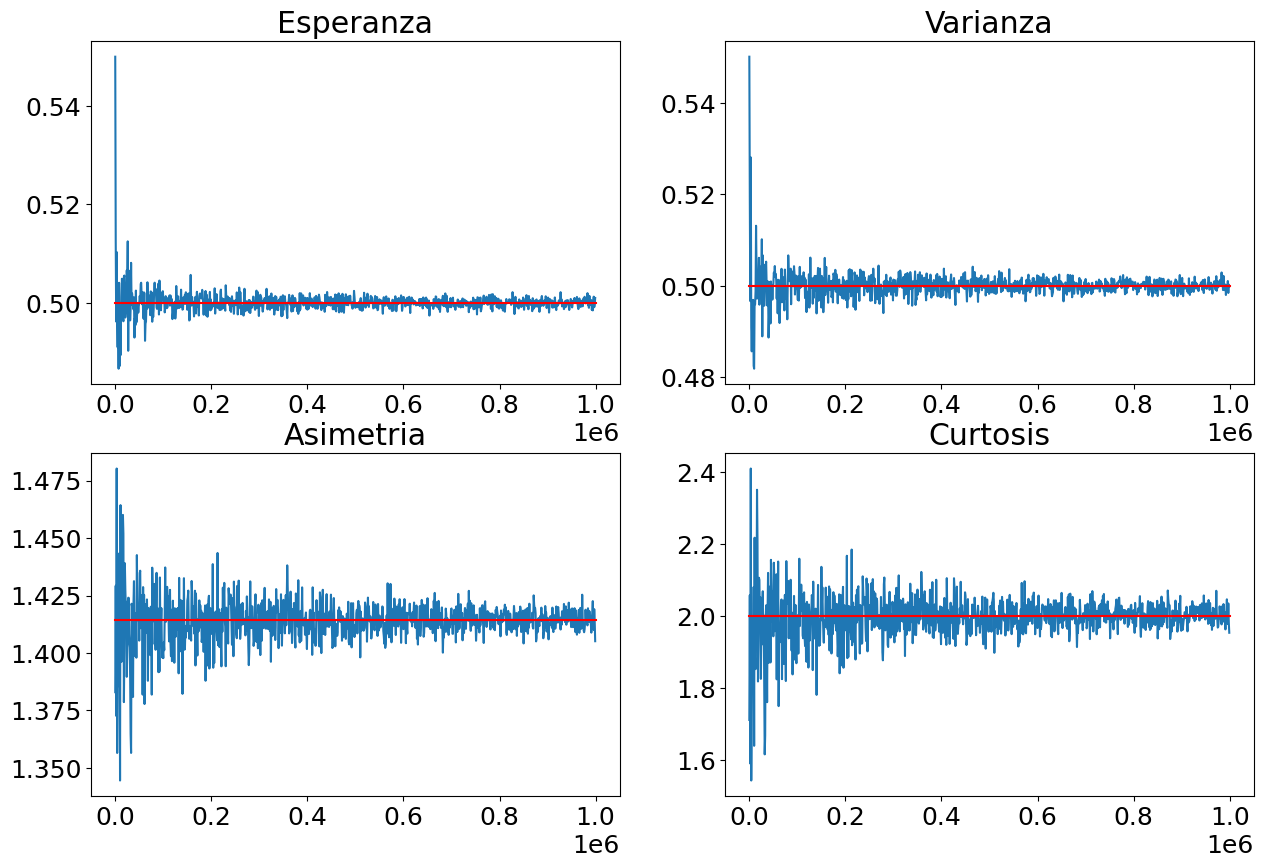

In [15]:
mu=0.5

datos_poiss =stats.poisson.rvs(mu=mu, size=size)
promedio = sum(datos_poiss)/size
var_emp = sum((datos_poiss - promedio)*(datos_poiss-promedio))/size
asim = stats.skew(datos_poiss)
curtos = stats.kurtosis(datos_poiss)


print('esperanza empírica:',promedio,' teórico: ',n*p)
print('varianza empírica:',var_emp,' teórico: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórico: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

prom_grafico=[]
var_emp_grafico=[]
asim_grafico=[]
curtos_grafico=[]

ran = range(100,1000000,1000)
for size in ran:
    datos_poiss =stats.poisson.rvs(mu=mu, size=size)
    prom_grafico.append(sum(datos_poiss)/size)
    var_emp_grafico.append(sum((datos_poiss - promedio)*(datos_poiss-promedio))/size)
    asim_grafico.append(stats.skew(datos_poiss))
    curtos_grafico.append(stats.kurtosis(datos_poiss))


fig, axs = plt.subplots(2, 2,figsize=(15, 10), dpi=100)
axs[0,0].set_title("Esperanza")
axs[0,0].plot(ran,prom_grafico)
axs[0,0].plot((100,1000000), (mu, mu), color='red')
axs[0,1].set_title("Varianza")
axs[0,1].plot(ran,var_emp_grafico)
axs[0,1].plot((100,1000000), (mu, mu), color='red')
axs[1,0].set_title("Asimetria")
axs[1,0].plot(ran,asim_grafico)
axs[1,0].plot((100,1000000), (1/math.sqrt(mu),1/math.sqrt(mu)), color='red')
axs[1,1].set_title("Curtosis")
axs[1,1].plot(ran,curtos_grafico)
axs[1,1].plot((100,1000000), (1/mu,1/mu), color='red')

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
